In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
file_dir = 'C:/Users/fhsalvo/data/FHS/CWRU/Modules/M8_ETL/'


In [3]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [9]:
ratings.sample(10)

,userId,movieId,rating,timestamp
10405081,107412,2478,3.0,950071637
6183001,63734,329,4.0,835713447
20917821,217361,7361,5.0,1155497526
11717616,121483,59784,3.0,1273789613
18825129,195525,1463,1.0,1031276273
15056412,156618,4306,3.0,1487802484
11994270,124297,79132,4.5,1479514583
13537011,140726,22,2.0,1246789958
24102596,250263,3267,3.5,1453418008
7960764,82059,2890,4.0,979767389


In [10]:
kaggle_metadata.sample(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35119,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,17223,tt0867205,en,Two Tigers,No overview found.,...,2007-02-14,0.0,0.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Two Tigers,False,3.5,2.0
30508,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",http://www.thewildernessofjames.com/,253315,tt2357770,en,All the Wilderness,Keeping to himself in the wake his father's de...,...,2014-03-09,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All the Wilderness,False,7.0,13.0
43807,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,340215,tt3868978,en,Dusk,"John Whitmore wakes to find his wife, Anne, ha...",...,2016-05-24,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dusk,False,5.9,10.0


In [11]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [12]:
wiki_movies_df.sample(10)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
4588,https://en.wikipedia.org/wiki/Grace_Is_Gone_(f...,2007.0,https://www.imdb.com/title/tt0772168/,Grace Is Gone,James C. Strouse,"[John Cusack, Grace Loh, Galt Niederhoffer, Ce...",NaN,NaN,NaN,"[John Cusack, Alessandro Nivola]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4664,https://en.wikipedia.org/wiki/Mr._Woodcock,2007.0,https://www.imdb.com/title/tt0419984/,Mr. Woodcock,Craig Gillespie,"[Bob Cooper, David Dobkin]",NaN,NaN,NaN,"[Billy Bob Thornton, Seann William Scott, Susa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,https://en.wikipedia.org/wiki/Heist_(2001_film),2001.0,https://www.imdb.com/title/tt0252503/,Heist,David Mamet,"[Art Linson, Elie Samaha, Andrew Stevens]",NaN,NaN,NaN,"[Gene Hackman, Danny DeVito, Delroy Lindo]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,https://en.wikipedia.org/wiki/Crazy_People,1990.0,https://www.imdb.com/title/tt0099316/,Crazy People,"[Tony Bill, Barry L. Young (commercials)]","[Thomas Brand, Robert K. Weiss]",NaN,NaN,NaN,"[Dudley Moore, Daryl Hannah, Paul Reiser]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,https://en.wikipedia.org/wiki/Wilder_Napalm,1993.0,https://www.imdb.com/title/tt0108569/,Wilder Napalm,Glenn Gordon Caron,NaN,NaN,NaN,NaN,"[Debra Winger, Dennis Quaid, Arliss Howard]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,https://en.wikipedia.org/wiki/Initiation:_Sile...,1990.0,https://www.imdb.com/title/tt0100618/,"Silent Night, Deadly Night 4: Initiation",Brian Yuzna,Richard N. Gladstein,Woody Keith,"[Brian Yuzna, Arthur H. Gorson, S.J. Smith]",NaN,"[Clint Howard, Neith Hunter, Tommy Hinkley, Re...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1836,https://en.wikipedia.org/wiki/Trees_Lounge,1996.0,https://www.imdb.com/title/tt0117958/,Trees Lounge,Steve Buscemi,"[Brad Wyman, Chris Hanley]",NaN,NaN,NaN,"[Steve Buscemi, Chloë Sevigny, Mark Boone Juni...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3552,https://en.wikipedia.org/wiki/Stuck_on_You_(film),2003.0,https://www.imdb.com/title/tt0338466/,Stuck on You,"[Peter Farrelly, Bobby Farrelly]","[Peter Farrelly, Bobby Farrelly, Bradley Thomas]","[Peter Farrelly, Bobby Farrelly]","[Bennett Yellin, Charles B. Wessler, Peter Far...",NaN,"[Matt Damon, Greg Kinnear, Eva Mendes, Wen Yan...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6464,https://en.wikipedia.org/wiki/The_Song_(2014_f...,2014.0,https://www.imdb.com/title/tt2517044/,The Song,Richard Ramsey,Shane Sooter,NaN,NaN,NaN,"[Alan Powell, Ali Faulkner, Caitlin Nicol-Thom...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,https://en.wikipedia.org/wiki/Ruby_(1992_film),1992.0,https://www.imdb.com/title/tt0105291/,Ruby,John Mackenzie,Steve Golin,NaN,NaN,NaN,"[Danny Aiello, Sherilyn Fenn, Arliss Howard]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [14]:
wiki_movies_df=pd.DataFrame(wiki_movies)
wiki_movies_df.head(1)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [16]:
wiki_movies_df=pd.DataFrame(wiki_movies)
wiki_movies_df.head(1)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
wiki_movies_df.sample(20)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
3772,https://en.wikipedia.org/wiki/Hoodwinked!,2005,https://www.imdb.com/title/tt0443536/,Hoodwinked!,Cory Edwards,"[Katie Hooten, Maurice Kanbar, David K. Lovegr...","[Cory Edwards, Todd Edwards, Tony Leech]","[Cory Edwards, Todd Edwards]",NaN,"[Anne Hathaway, Glenn Close, Jim Belushi, Patr...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4823,https://en.wikipedia.org/wiki/Avatar_(2009_film),2009,https://www.imdb.com/title/tt0499549/,Avatar,James Cameron,"[James Cameron, Jon Landau]",NaN,NaN,NaN,"[Sam Worthington, Zoe Saldana, Stephen Lang, M...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5112,https://en.wikipedia.org/wiki/Hubble_3D,2010,https://www.imdb.com/title/tt1433813/,Hubble 3D,Toni Myers,"[Toni Myers, Graeme Ferguson]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3349,https://en.wikipedia.org/wiki/Looney_Tunes:_Ba...,2003,https://www.imdb.com/title/tt0318155/,Looney Tunes: Back in Action,"[Joe Dante, [1], Eric Goldberg, (animation dir...","[Paula Weinstein, Bernie Goldman]",Larry Doyle,"[Larry Doyle, Glenn Ficarra, John Requa]",NaN,"[Brendan Fraser, Jenna Elfman, Steve Martin, T...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3468,https://en.wikipedia.org/wiki/Birth_(film),2004,https://www.imdb.com/title/tt0337876/,Birth,Jonathan Glazer,"[Lizie Gower, Nick Morris, Jean-Louis Piel]",NaN,NaN,NaN,"[Nicole Kidman, Cameron Bright, Danny Huston, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3648,https://en.wikipedia.org/wiki/Torque_(film),2004,https://www.imdb.com/title/tt0329691/,Torque,Joseph Kahn,"[Brad Luff, Neal H. Moritz]",NaN,NaN,NaN,"[Martin Henderson, Ice Cube, Monet Mazur, Adam...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4964,https://en.wikipedia.org/wiki/Pandorum,2009,https://www.imdb.com/title/tt1188729/,Pandorum,Christian Alvart,"[Robert Kulzer, Jeremy Bolt, Paul W. S. Anderson]",Travis Milloy,"[Travis Milloy, Christian Alvart]",NaN,"[Dennis Quaid, Ben Foster, Cam Gigandet, Antje...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2669,https://en.wikipedia.org/wiki/Little_Nicky,2000,https://www.imdb.com/title/tt0185431/,Little Nicky,Steven Brill,"[Jack Giarraputo, Robert Simonds]",NaN,NaN,NaN,"[Adam Sandler, Patricia Arquette, Harvey Keite...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6410,https://en.wikipedia.org/wiki/Pixels_(2015_film),2015,https://www.imdb.com/title/tt2120120/,Pixels,Chris Columbus,"[Adam Sandler, [1], Chris Columbus, [1], Mark ...","[Tim Herlihy, Timothy Dowling]",Tim Herlihy,"[Pixels, by Patrick Jean]","[Adam Sandler, Kevin James, Michelle Monaghan,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1738,https://en.wikipedia.org/wiki/Tender_Fictions,1996,https://www.imdb.com/title/tt0114646/,Tender Fictions,Barbara Hammer,NaN,NaN,NaN,NaN,Barbara Hammer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7076 entries, 0 to 7075
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   url                     7076 non-null   object
 1   year                    7076 non-null   int64 
 2   imdb_link               7076 non-null   object
 3   title                   7075 non-null   object
 4   Directed by             7074 non-null   object
 5   Produced by             6716 non-null   object
 6   Screenplay by           2318 non-null   object
 7   Story by                1002 non-null   object
 8   Based on                2190 non-null   object
 9   Starring                6892 non-null   object
 10  Narrated by             282 non-null    object
 11  Music by                6482 non-null   object
 12  Cinematography          6378 non-null   object
 13  Edited by               6379 non-null   object
 14  Productioncompany       4529 non-null   object
 15  Dist

In [19]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [20]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [21]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [22]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [23]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [24]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [25]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [26]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [27]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    7033 non-null   object
 1   year                   7033 non-null   int64 
 2   imdb_link              7033 non-null   object
 3   title                  7032 non-null   object
 4   Based on               2181 non-null   object
 5   Starring               6849 non-null   object
 6   Cinematography         6342 non-null   object
 7   Release date           7001 non-null   object
 8   Running time           6894 non-null   object
 9   Country                6797 non-null   object
 10  Language               6789 non-null   object
 11  Budget                 4738 non-null   object
 12  Box office             5485 non-null   object
 13  Director               7033 non-null   object
 14  Distributor            6676 non-null   object
 15  Editor(s)            

In [28]:
wiki_movies_df.sample(5)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
147,https://en.wikipedia.org/wiki/Mermaids_(1990_f...,1990,https://www.imdb.com/title/tt0100140/,Mermaids,"[Mermaids, by, Patty Dann]","[Cher, Bob Hoskins, Winona Ryder, Michael Scho...",Howard Atherton,"[December 14, 1990, (, 1990-12-14, )]",110 minutes,United States,...,$20 million,$35.4 million,Richard Benjamin,Orion Pictures,Jacqueline Cambas,Jack Nitzsche,"[Lauren Lloyd, Wallis Nicita, Patrick J. Palme...",NaN,June Roberts,tt0100140
4365,https://en.wikipedia.org/wiki/The_Condemned,2007,https://www.imdb.com/title/tt0443473/,The Condemned,NaN,"[Steve Austin, Vinnie Jones, Robert Mammone, T...",Ross Emery,"[April 27, 2007, (, 2007-04-27, )]",113 minutes,United States,...,$3 million,$8.6 million,Scott Wiper,Lionsgate,Derek Brechin,Graeme Revell,Joel Simon,"[WWE Films, (Condemned Productions, Inc.), Col...","[Scott Wiper, Rob Hedden, Andrew Hedden]",tt0443473
1178,https://en.wikipedia.org/wiki/Boys_Life_(film),1995,https://www.imdb.com/title/tt0112570/,Boys Life,NaN,NaN,NaN,1995,91 min.,United States,...,NaN,NaN,"[Robert Lee King, Raoul O'Connell]",NaN,NaN,NaN,NaN,NaN,NaN,tt0112570
4974,https://en.wikipedia.org/wiki/The_Princess_and...,2009,https://www.imdb.com/title/tt0780521/,The Princess and the Frog,"[The Frog Princess, by, E. D. Baker, The Frog ...","[Anika Noni Rose, Bruno Campos, Keith David, M...",NaN,"[November 25, 2009, (, 2009-11-25, ), (Los Ang...",95 minutes,United States,...,$105 million,$267–$271 million,"[Ron Clements, John Musker]","[Walt Disney Studios, Motion Pictures]",Jeff Draheim,Randy Newman,Peter Del Vecho,"[Walt Disney Pictures, Walt Disney Animation S...","[Ron Clements, John Musker, Greg Erb, Jason Or...",tt0780521
5745,https://en.wikipedia.org/wiki/All_Is_Lost,2013,https://www.imdb.com/title/tt2017038/,All Is Lost,NaN,Robert Redford,Frank G. DeMarco,"[May 22, 2013, (, 2013-05-22, ), (, Cannes, ),...",105 minutes,"[Canada, [4], United States, [4]]",...,$8.5 million,$13.6 million,J. C. Chandor,"[Lionsgate, /, Roadside Attractions, (US), [1]...",Pete Beaudreau,Alex Ebert,"[Justin Nappi, Teddy Schwarzman, Neal Dodson, ...","[Black Bear Pictures, [1], Treehouse Pictures,...",J. C. Chandor,tt2017038


In [29]:
box_office = wiki_movies_df['Box office'].dropna()

In [30]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [32]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [33]:
box_office[box_office.map(lambda x: type(x) != str)]

Series([], Name: Box office, dtype: object)

In [34]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [35]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [36]:
import re

In [38]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [39]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [40]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [41]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [42]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [43]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [44]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [45]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [47]:
wiki_movies_df.sample(3)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
2722,https://en.wikipedia.org/wiki/Rules_of_Engagem...,2000,https://www.imdb.com/title/tt0160797/,Rules of Engagement,NaN,"[Tommy Lee Jones, Samuel L. Jackson, Guy Pearc...","[William A. Fraker, Nicola Pecorini]","[April 7, 2000, (, 2000-04-07, )]",128 minutes,United States,...,$71.7 million,William Friedkin,Paramount Pictures,Augie Hess,Mark Isham,"[Scott Rudin, Richard D. Zanuck]","[Scott Rudin Productions, Seven Arts Pictures]",James Webb,tt0160797,71700000.0
5928,https://en.wikipedia.org/wiki/Kiss_of_the_Damned,2013,https://www.imdb.com/title/tt1959438/,Kiss of the Damned,NaN,"[Josephine de La Baume, Milo Ventimiglia, Roxa...",Tobias Datum,"[November 7, 2012, (, 2012-11-07, ), (, Stockh...",97 minutes,United States,...,"$14,752",Xan Cassavetes,Magnet Releasing,"[Taylor Gianotas, John F. Lyons]",Steven Hufsteter,"[Jen Gatien, Alex Orlovsky]","[Deerjen Films, Verisimilitude, Bersin Picture...",Xan Cassavetes,tt1959438,14752.0
722,https://en.wikipedia.org/wiki/Extreme_Justice_...,1993,https://www.imdb.com/title/tt0106850/,Extreme Justice,NaN,"[Lou Diamond Phillips, Scott Glenn, Chelsea Fi...",Mark Irwin,"June 26, 1993",96 minutes,United States,...,NaN,Mark L. Lester,Trimark Pictures,Donn Aron,David Michael Frank,Frank Sacks,NaN,"[Frank Sacks, Robert Boris]",tt0106850,NaN


In [48]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [49]:
budget = wiki_movies_df['Budget'].dropna()

In [50]:
budget.head()

0    $20 million
1     $6 million
2    $35 million
3    $12 million
4    $25 million
Name: Budget, dtype: object

In [51]:

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)


In [52]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [53]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\fhsalvo\AppData\Local\Temp/ipykernel_14676/3746335845.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [54]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [55]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [56]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [58]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [59]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [60]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [61]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [62]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [63]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [64]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [65]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [67]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [68]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [69]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [70]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [72]:
kaggle_metadata.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [71]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [73]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [74]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [76]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [77]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [78]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [79]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [80]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [81]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

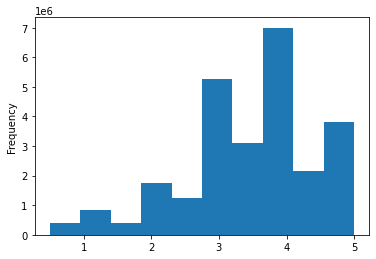

In [82]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [83]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [84]:
movies_df.head(1)


,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00


In [85]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6052 entries, 0 to 6051
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    6052 non-null   object        
 1   year                   6052 non-null   int64         
 2   imdb_link              6052 non-null   object        
 3   title_wiki             6052 non-null   object        
 4   Based on               1972 non-null   object        
 5   Starring               5940 non-null   object        
 6   Cinematography         5568 non-null   object        
 7   Release date           6041 non-null   object        
 8   Country                5882 non-null   object        
 9   Language               5918 non-null   object        
 10  Director               6052 non-null   object        
 11  Distributor            5870 non-null   object        
 12  Editor(s)              5701 non-null   object        
 13  Com

In [98]:
combined_titles_list = list(movies_df.columns)
combined_titles_list

['url',
 'year',
 'imdb_link',
 'title_wiki',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Country',
 'Language',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id',
 'box_office',
 'budget_wiki',
 'release_date_wiki',
 'running_time',
 'belongs_to_collection',
 'budget_kaggle',
 'genres',
 'homepage',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'video',
 'vote_average',
 'vote_count']

In [100]:
print(combined_titles_list)

['Based on', 'Cinematography', 'Composer(s)', 'Country', 'Director', 'Distributor', 'Editor(s)', 'Language', 'Producer(s)', 'Production company(s)', 'Release date', 'Starring', 'Writer(s)', 'belongs_to_collection', 'box_office', 'budget_kaggle', 'budget_wiki', 'genres', 'homepage', 'id', 'imdb_id', 'imdb_link', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date_kaggle', 'release_date_wiki', 'revenue', 'running_time', 'runtime', 'spoken_languages', 'status', 'tagline', 'title_kaggle', 'title_wiki', 'url', 'video', 'vote_average', 'vote_count', 'year']


In [101]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [102]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='running_time', ylabel='runtime'>

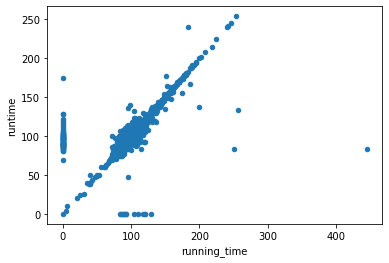

In [103]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

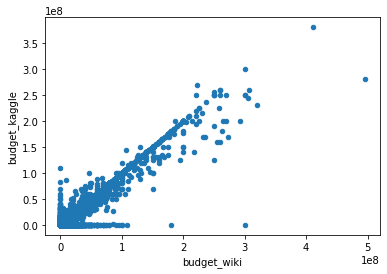

In [104]:
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

In [105]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,English,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [106]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [107]:
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,United States,NaN,...,1995-08-22,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.10,7.00
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,"[United States, Germany, Japan, [1]]",NaN,...,1995-09-14,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.50,4.00
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.00,95.00,[],Released,NaN,Let It Be Me,False,8.00,2.00
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.00,1.00
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,United States,English,...,1997-01-01,0.00,110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.50,4.00
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,United States,NaN,...,1999-02-22,0.00,86.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.70,6.00
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,NaN,English,...,2000-01-01,0.00,107.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.00,0.00
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,United States,English,...,2002-09-09,"97,000.00",140.00,[],NaN,NaN,Stevie,False,6.70,13.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,"[Denmark, USA, UK]",NaN,...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,United States,English,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [108]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                        5479
NaN                             134
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 198, dtype: int64

In [109]:
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [110]:
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

In [111]:
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [112]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Director,Distributor,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,20th Century Fox,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,Avenue Pictures,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,TriStar Pictures,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,Orion Pictures,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,John Cornell,Paramount Pictures,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,"[Participant Media (Chile), Piffl Medien (Germ...",...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,Good Deed Entertainment,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,"[Sony Pictures Releasing, (Russia), [1]]",...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,Neon,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemin

In [113]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [114]:
new_column_order=  ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on']
                      
movies_df=movies_df[new_column_order]
movies_df.head(1)

,imdb_id,id,title_kaggle,original_title,tagline,belongs_to_collection,url,imdb_link,runtime,budget_kaggle,...,production_countries,Distributor,Producer(s),Director,Starring,Cinematography,Editor(s),Writer(s),Composer(s),Based on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.00,"49,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,"[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[David Arnott, James Cappe]","[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"


In [115]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

c:\Users\fhsalvo\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [116]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 794.2 MB


In [118]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,110,1.00,2015-03-09 22:52:09
1,1,147,4.50,2015-03-09 23:07:15
2,1,858,5.00,2015-03-09 22:52:03
3,1,1221,5.00,2015-03-09 22:52:26
4,1,1246,5.00,2015-03-09 22:52:36
5,1,1968,4.00,2015-03-09 23:02:28
6,1,2762,4.50,2015-03-09 22:48:20
7,1,2918,5.00,2015-03-09 22:53:13
8,1,2959,4.00,2015-03-09 22:53:21
9,1,4226,4.00,2015-03-09 23:03:48


In [119]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1)

In [122]:
rating_counts.head(1)

,movieId,rating,count,timestamp
0,1,0.50,441,441


In [123]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')
rating_counts.head(1)

rating,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"


In [124]:
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

In [125]:
rating_counts.head(1)

,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"


In [126]:
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [128]:
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)
movies_with_ratings_df.sample(5)

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
670,tt0107554,9516,Menace II Society,Menace II Society,This is the truth. This is what's real.,NaN,https://en.wikipedia.org/wiki/Menace_II_Society,https://www.imdb.com/title/tt0107554/,97.00,"3,500,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2860,tt0159365,2289,Cold Mountain,Cold Mountain,Find the strength. Find the courage. No matter...,NaN,https://en.wikipedia.org/wiki/Cold_Mountain_(f...,https://www.imdb.com/title/tt0159365/,154.00,"79,000,000.00",...,37.00,95.00,45.00,358.00,116.00,"1,349.00",497.00,"3,256.00",524.00,"2,165.00"
3287,tt0422093,16186,Diary of a Mad Black Woman,Diary of a Mad Black Woman,Time heals the heart. Faith heals the rest.,NaN,https://en.wikipedia.org/wiki/Diary_of_a_Mad_B...,https://www.imdb.com/title/tt0422093/,116.00,"5,500,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2386,tt0199129,70282,The Visit,The Visit,NaN,NaN,https://en.wikipedia.org/wiki/The_Visit_(2000_...,https://www.imdb.com/title/tt0199129/,107.00,NaN,...,12.00,10.00,14.00,30.00,25.00,45.00,23.00,13.00,5.00,5.00
475,tt0104879,55694,Miracle Beach,Miracle Beach,Miracle Beach It will really raise your spirits.,NaN,https://en.wikipedia.org/wiki/Miracle_Beach,https://www.imdb.com/title/tt0104879/,88.00,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [1]:
from sqlalchemy import create_engine